<h1 style="color:red; text-align:center; border:2px solid red; font-size: 3rem">IPL ANALYSIS 2024</h1>

<h3>All Data Taken From <a href="https://codebasics.io/challenge/codebasics-resume-project-challenge/13">Code Basics</a> </h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<hr>
<h1>1. Data Exploration</h1>
<hr>

In [2]:
df_players = pd.read_csv("datasets/dim_players.csv")

In [3]:
df_players.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [4]:
df_players.shape

(292, 5)

In [5]:
df_players.playingRole.unique()

array(['Batter', 'Middle order Batter', 'Batting Allrounder',
       'Opening Batter', 'Allrounder', 'Bowling Allrounder',
       'Wicketkeeper Batter', 'Top order Batter', 'Bowler'], dtype=object)

In [6]:
df_players.playingRole.value_counts()

playingRole
Bowler                 117
Allrounder              41
Wicketkeeper Batter     29
Top order Batter        27
Bowling Allrounder      23
Batting Allrounder      19
Middle order Batter     13
Batter                  12
Opening Batter          11
Name: count, dtype: int64

In [7]:
df_players.team.unique()

array(['Super Kings', 'KKR', 'Capitals', 'RCB', 'Mumbai', 'Sunrisers',
       'Royals', 'Punjab Kings', 'Titans', 'Super Giants'], dtype=object)

In [8]:
df_players.team.value_counts()

team
Mumbai          39
Punjab Kings    38
Sunrisers       35
KKR             35
Royals          33
RCB             30
Capitals        29
Super Kings     28
Titans          13
Super Giants    12
Name: count, dtype: int64

In [9]:
df_players.isna().sum()

name            0
team            0
battingStyle    0
bowlingStyle    0
playingRole     0
dtype: int64

In [10]:
df_players.battingStyle.unique()

array(['Right hand Bat', 'Left hand Bat'], dtype=object)

In [11]:
df_players.battingStyle.value_counts()

battingStyle
Right hand Bat    210
Left hand Bat      82
Name: count, dtype: int64

In [12]:
df_players["bowlingStyle"].value_counts()

bowlingStyle
Right arm Offbreak                                52
Right arm Medium                                  47
Right arm Fast medium                             28
Right arm Fast                                    26
Not Available                                     23
Legbreak                                          21
Slow Left arm Orthodox                            21
Legbreak Googly                                   16
Right arm Medium fast                             16
Left arm Fast medium                              12
Left arm Medium fast                              10
Left arm Medium                                    5
Left arm Wrist spin                                4
Left arm Fast                                      3
Right arm Offbreak, Legbreak Googly                2
Right arm Offbreak, Legbreak                       2
Right arm Medium, Right arm Offbreak               2
Right arm Medium, Right arm Offbreak, Legbreak     1
Slow Left arm Orthodox, Left arm 

In [13]:
df_match = pd.read_csv("datasets/dim_match_summary.csv")

In [14]:
df_match

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942
...,...,...,...,...,...,...
201,Mumbai,RCB,RCB,8 wickets,"Apr 2, 2023",T202485
202,Royals,Sunrisers,Royals,72 runs,"Apr 2, 2023",T209117
203,Super Giants,Capitals,Super Giants,50 runs,"Apr 1, 2023",T208512
204,Punjab Kings,KKR,Punjab Kings,7 runs,"Apr 1, 2023",T202853


In [15]:
df_match.isna().sum()

team1        0
team2        0
winner       0
margin       0
matchDate    0
match_id     0
dtype: int64

In [16]:
type(df_match["matchDate"][0])

str

In [17]:
df_bating = pd.read_csv("datasets/fact_bating_summary.csv")

df_bowling = pd.read_csv("datasets/fact_bowling_summary.csv")

In [18]:
df_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [19]:
df_bating.isna().sum()

match_id       0
match          0
teamInnings    0
battingPos     0
batsmanName    0
out/not_out    0
runs           0
balls          0
4s             0
6s             0
SR             0
dtype: int64

In [20]:
df_bating.dtypes

match_id       object
match          object
teamInnings    object
battingPos      int64
batsmanName    object
out/not_out    object
runs            int64
balls           int64
4s              int64
6s              int64
SR             object
dtype: object

In [21]:
df_bating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match_id     3268 non-null   object
 1   match        3268 non-null   object
 2   teamInnings  3268 non-null   object
 3   battingPos   3268 non-null   int64 
 4   batsmanName  3268 non-null   object
 5   out/not_out  3268 non-null   object
 6   runs         3268 non-null   int64 
 7   balls        3268 non-null   int64 
 8   4s           3268 non-null   int64 
 9   6s           3268 non-null   int64 
 10  SR           3268 non-null   object
dtypes: int64(5), object(6)
memory usage: 281.0+ KB


In [22]:
type(df_bating["SR"][0])

str

In [23]:
df_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [24]:
df_bating[df_bating.match_id == "T203817"]

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60
5,T203817,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25
6,T203817,Super Kings Vs KKR,KKR,3,NitishRana,out,0,1,0,0,0.00
7,T203817,Super Kings Vs KKR,KKR,4,SunilNarine,out,2,2,0,0,100.00
8,T203817,Super Kings Vs KKR,KKR,5,EoinMorgan,out,4,8,0,0,50.00
9,T203817,Super Kings Vs KKR,KKR,6,DineshKarthik,out,9,7,0,1,128.57


In [25]:
df_bowling[df_bowling.match_id == "T203817"]

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.00,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.00,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.00,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.50,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.50,6,0,1,1,0
5,T203817,Super Kings Vs KKR,KKR,VenkateshIyer,1.0,0,5,0,5.00,2,0,0,0,0
6,T203817,Super Kings Vs KKR,Super Kings,DeepakChahar,4.0,0,32,1,8.00,10,4,1,1,0
7,T203817,Super Kings Vs KKR,Super Kings,JoshHazlewood,4.0,0,29,2,7.25,10,2,1,2,0
8,T203817,Super Kings Vs KKR,Super Kings,ShardulThakur,4.0,0,38,3,9.50,11,3,1,4,1
9,T203817,Super Kings Vs KKR,Super Kings,DwayneBravo,4.0,0,29,1,7.25,9,1,2,0,0


In [26]:
df_bowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match_id     2436 non-null   object 
 1   match        2436 non-null   object 
 2   bowlingTeam  2436 non-null   object 
 3   bowlerName   2436 non-null   object 
 4   overs        2436 non-null   float64
 5   maiden       2436 non-null   int64  
 6   runs         2436 non-null   int64  
 7   wickets      2436 non-null   int64  
 8   economy      2436 non-null   float64
 9   0s           2436 non-null   int64  
 10  4s           2436 non-null   int64  
 11  6s           2436 non-null   int64  
 12  wides        2436 non-null   int64  
 13  noBalls      2436 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 266.6+ KB


<hr>
<h1>2. Data Cleaning</h1>
<hr>

In [27]:
df_match

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942
...,...,...,...,...,...,...
201,Mumbai,RCB,RCB,8 wickets,"Apr 2, 2023",T202485
202,Royals,Sunrisers,Royals,72 runs,"Apr 2, 2023",T209117
203,Super Giants,Capitals,Super Giants,50 runs,"Apr 1, 2023",T208512
204,Punjab Kings,KKR,Punjab Kings,7 runs,"Apr 1, 2023",T202853


In [28]:
type(df_match["matchDate"][0])

str

In [29]:
df_match["matchDate"].unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [30]:
pd.to_datetime(df_match["matchDate"], format="%b %d, %Y")

ValueError: time data "May 28-29, 2023" doesn't match format "%b %d, %Y", at position 133. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [31]:
df_match.replace("May 28-29, 2023", "May 29, 2023", inplace=True)

In [32]:
df_match["matchDate"].unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [33]:
df_match["matchDate"] = pd.to_datetime(df_match["matchDate"], format="%b %d, %Y")

In [34]:
df_match.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942


In [35]:
type(df_match["matchDate"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
df_match.dtypes

team1                object
team2                object
winner               object
margin               object
matchDate    datetime64[ns]
match_id             object
dtype: object

**Creating New Column as season for taking records of season 1, 2, 3**

In [37]:
years = list(df_match["matchDate"].dt.year.unique())

In [38]:
type(years)

list

In [39]:
years

[np.int32(2021), np.int32(2022), np.int32(2023)]

In [40]:
years.sort()

In [41]:
years

[np.int32(2021), np.int32(2022), np.int32(2023)]

In [42]:
for i, year in years:
    print(i, year)

TypeError: cannot unpack non-iterable numpy.int32 object

In [43]:
year_to_season = {
    year : f"Season {i+1}"
    for i, year in enumerate(sorted(df_match["matchDate"].dt.year.unique()))
}
year_to_season

{np.int32(2021): 'Season 1',
 np.int32(2022): 'Season 2',
 np.int32(2023): 'Season 3'}

In [44]:
df_match["season"] = df_match["matchDate"].dt.year.map(year_to_season)

df_match

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,Season 1
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,Season 1
...,...,...,...,...,...,...,...
201,Mumbai,RCB,RCB,8 wickets,2023-04-02,T202485,Season 3
202,Royals,Sunrisers,Royals,72 runs,2023-04-02,T209117,Season 3
203,Super Giants,Capitals,Super Giants,50 runs,2023-04-01,T208512,Season 3
204,Punjab Kings,KKR,Punjab Kings,7 runs,2023-04-01,T202853,Season 3


In [45]:
df_bating.head(20)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60
5,T203817,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25
6,T203817,Super Kings Vs KKR,KKR,3,NitishRana,out,0,1,0,0,0.00
7,T203817,Super Kings Vs KKR,KKR,4,SunilNarine,out,2,2,0,0,100.00
8,T203817,Super Kings Vs KKR,KKR,5,EoinMorgan,out,4,8,0,0,50.00
9,T203817,Super Kings Vs KKR,KKR,6,DineshKarthik,out,9,7,0,1,128.57


In [46]:
type(df_bating["SR"][0])

str

In [47]:
df_bating[df_bating.SR == "-"]

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
14,T203817,Super Kings Vs KKR,KKR,11,VarunChakravarthy,not_out,0,0,0,0,-
30,T206442,Capitals Vs KKR,KKR,9,LockieFerguson,not_out,0,0,0,0,-
39,T208597,RCB Vs KKR,RCB,9,GeorgeGarton,not_out,0,0,0,0,-
62,T201819,Capitals Vs Super Kings,Super Kings,8,RavindraJadeja,not_out,0,0,0,0,-
84,T201979,Mumbai Vs Sunrisers,Mumbai,11,TrentBoult,not_out,0,0,0,0,-
195,T207754,RCB Vs Punjab Kings,RCB,7,SrikarBharat,not_out,0,0,0,0,-
249,T201051,KKR Vs Punjab Kings,Punjab Kings,7,FabianAllen,not_out,0,0,0,0,-
312,T206700,Capitals Vs KKR,KKR,9,LockieFerguson,not_out,0,0,0,0,-
370,T203188,Punjab Kings Vs Sunrisers,Punjab Kings,9,MohammedShami,not_out,0,0,0,0,-
446,T207857,Royals Vs Punjab Kings,Royals,11,MustafizurRahman,not_out,0,0,0,0,-


In [48]:
df_bating.replace(to_replace={
    "SR":"-"
}, value=0.00, inplace=True)

In [49]:
df_bating.head(20)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60
5,T203817,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25
6,T203817,Super Kings Vs KKR,KKR,3,NitishRana,out,0,1,0,0,0.00
7,T203817,Super Kings Vs KKR,KKR,4,SunilNarine,out,2,2,0,0,100.00
8,T203817,Super Kings Vs KKR,KKR,5,EoinMorgan,out,4,8,0,0,50.00
9,T203817,Super Kings Vs KKR,KKR,6,DineshKarthik,out,9,7,0,1,128.57


In [50]:
df_bating[df_bating.SR == "-"]

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR


In [51]:
type(df_bating["SR"][0])

str

In [52]:
df_bating["SR"]= pd.to_numeric(df_bating["SR"])

In [53]:
type(df_bating["SR"][0])

numpy.float64

<hr>
<h1>3. Data Transformation</h1>
<hr>

In [54]:
df_bating.head(2)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76


In [55]:
df_bowling.head(2)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0


In [56]:
df_match.head(2)

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1


In [57]:
df_players.head(2)

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter


In [58]:
df_bating_merged = pd.merge(df_bating,df_players, left_on="batsmanName", right_on="name" )

df_bating_merged.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,name,team,battingStyle,bowlingStyle,playingRole
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [59]:
df_bating_merged.drop(columns="name", inplace=True)
df_bating_merged.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team,battingStyle,bowlingStyle,playingRole
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,Super Kings,Right hand Bat,Right arm Medium,Batter
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [60]:
df_bowling_merged = pd.merge(df_bowling,df_players, left_on="bowlerName", right_on="name" )
df_bowling_merged.drop(columns="name", inplace=True)
df_bowling_merged.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team,battingStyle,bowlingStyle,playingRole
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,KKR,Left hand Bat,Slow Left arm Orthodox,Allrounder
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,KKR,Right hand Bat,Right arm Fast medium,Bowler
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,KKR,Right hand Bat,Right arm Fast,Bowler
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,KKR,Right hand Bat,Legbreak Googly,Bowler
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,KKR,Left hand Bat,Right arm Offbreak,Bowling Allrounder


<hr>
<h1> 4. Insight Generation (PRIMARY)</h1>
<hr>

## 1. Top 10 batsmen based on past 3 years total runs scored.

In [61]:
top_runs = df_bating.groupby("batsmanName")["runs"].sum().sort_values(ascending=False).head(10)

top_runs

batsmanName
ShubmanGill        1851
FafduPlessis       1831
RuturajGaikwad     1593
KLRahul            1516
JosButtler         1509
ShikharDhawan      1392
ViratKohli         1385
SanjuSamson        1304
SuryakumarYadav    1225
GlennMaxwell       1214
Name: runs, dtype: int64

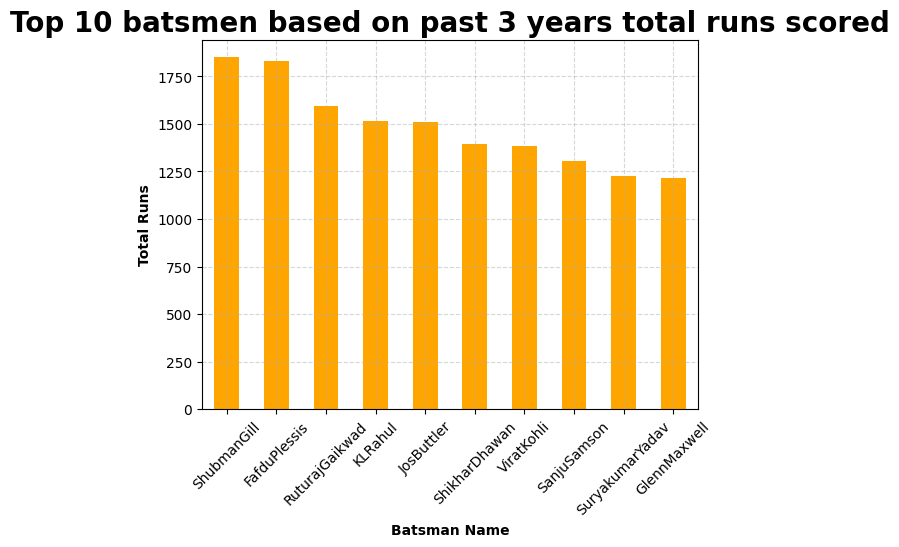

In [62]:
top_runs.plot(kind="bar", color="orange")
plt.title("Top 10 batsmen based on past 3 years total runs scored",fontsize="20", fontweight="bold")

plt.grid(linestyle='--', alpha=0.5)
plt.ylabel("Total Runs", fontsize="10", fontweight="bold")
plt.xlabel("Batsman Name", fontsize="10", fontweight="bold")

plt.xticks(rotation=45)
plt.show()

## 2. Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)

In [64]:
df_match.head()

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,Season 1
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,Season 1


In [66]:
df_bating_merged.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team,battingStyle,bowlingStyle,playingRole
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,Super Kings,Right hand Bat,Right arm Medium,Batter
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [67]:
df_bating_merged["outs"] = df_bating_merged["out/not_out"].apply(lambda x: 1 if x.strip().lower() != "not_out" else 0)
df_bating_merged.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team,battingStyle,bowlingStyle,playingRole,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings,Right hand Bat,Right arm Offbreak,Batter,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,Super Kings,Right hand Bat,Legbreak,Middle order Batter,1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,Super Kings,Right hand Bat,Right arm Medium,Batter,1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder,0
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,KKR,Right hand Bat,Right arm Offbreak,Opening Batter,1


In [69]:
df_bating_merged_season = pd.merge(df_bating_merged, df_match, on="match_id")

In [70]:
df_bating_merged_season.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,...,battingStyle,bowlingStyle,playingRole,outs,team1,team2,winner,margin,matchDate,season
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,...,Right hand Bat,Right arm Offbreak,Batter,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,...,Right hand Bat,Legbreak,Middle order Batter,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,...,Right hand Bat,Right arm Medium,Batter,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,...,Left hand Bat,Right arm Offbreak,Batting Allrounder,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,...,Right hand Bat,Right arm Offbreak,Opening Batter,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1


In [72]:
balls_group = df_bating_merged_season.groupby(["batsmanName","season"])["balls"].sum().reset_index()

balls_group

,batsmanName,season,balls
0,ABdeVilliers,Season 1,211
1,AaronFinch,Season 2,61
2,AbdulBasith,Season 3,1
3,AbdulSamad,Season 1,87
4,AbdulSamad,Season 2,7
...,...,...,...
496,YashasviJaiswal,Season 2,194
497,YashasviJaiswal,Season 3,382
498,YudhvirSingh,Season 3,2
499,YuzvendraChahal,Season 1,27


In [76]:
balls_group[balls_group["batsmanName"]=="YashasviJaiswal"]

,batsmanName,season,balls
495,YashasviJaiswal,Season 1,168
496,YashasviJaiswal,Season 2,194
497,YashasviJaiswal,Season 3,382


In [75]:
eligble_batsman = balls_group[balls_group["balls"]>=60].groupby("batsmanName").count()
eligble_batsman

,season,balls
batsmanName,,
ABdeVilliers,1,1
AaronFinch,1,1
AbdulSamad,2,2
AbhinavManohar,2,2
AbhishekSharma,3,3
...,...,...
VijayShankar,1,1
ViratKohli,3,3
WashingtonSundar,2,2


In [77]:
eligble_batsman_all_3_season = eligble_batsman[eligble_batsman["season"]==3]

eligble_batsman_all_3_season

,season,balls
batsmanName,,
AbhishekSharma,3,3
AidenMarkram,3,3
AmbatiRayudu,3,3
AndreRussell,3,3
DavidMiller,3,3
DavidWarner,3,3
DeepakHooda,3,3
DevduttPadikkal,3,3
DineshKarthik,3,3


In [79]:
eligble_batsman_all_3_season.index

Index(['AbhishekSharma', 'AidenMarkram', 'AmbatiRayudu', 'AndreRussell',
       'DavidMiller', 'DavidWarner', 'DeepakHooda', 'DevduttPadikkal',
       'DineshKarthik', 'FafduPlessis', 'GlennMaxwell', 'HardikPandya',
       'IshanKishan', 'JosButtler', 'KLRahul', 'KrunalPandya', 'MShahrukhKhan',
       'ManishPandey', 'MarcusStoinis', 'MayankAgarwal', 'MoeenAli',
       'NicholasPooran', 'NitishRana', 'PrithviShaw', 'QuintondeKock',
       'RahulTripathi', 'RavindraJadeja', 'RiyanParag', 'RohitSharma',
       'RuturajGaikwad', 'SanjuSamson', 'ShikharDhawan', 'ShimronHetmyer',
       'ShivamDube', 'ShubmanGill', 'SuryakumarYadav', 'VenkateshIyer',
       'ViratKohli', 'WriddhimanSaha', 'YashasviJaiswal'],
      dtype='object', name='batsmanName')

In [81]:
df_bating_eligible = df_bating_merged_season[df_bating_merged_season["batsmanName"].isin(eligble_batsman_all_3_season.index)]

df_bating_eligible.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,...,battingStyle,bowlingStyle,playingRole,outs,team1,team2,winner,margin,matchDate,season
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,...,Right hand Bat,Right arm Offbreak,Batter,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,...,Right hand Bat,Legbreak,Middle order Batter,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,...,Left hand Bat,Right arm Offbreak,Batting Allrounder,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,...,Right hand Bat,Right arm Offbreak,Opening Batter,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
5,T203817,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,...,Left hand Bat,Right arm Medium,Allrounder,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1


In [83]:
df_batsman_average = df_bating_eligible.groupby("batsmanName").apply(lambda x: x["runs"].sum() / x["outs"].sum())

df_batsman_average

C:\Users\memon\AppData\Local\Temp\ipykernel_12196\964054876.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_batsman_average = df_bating_eligible.groupby("batsmanName").apply(lambda x: x["runs"].sum() / x["outs"].sum())


batsmanName
AbhishekSharma     24.833333
AidenMarkram       32.291667
AmbatiRayudu       22.225806
AndreRussell       27.592593
DavidMiller        43.200000
DavidWarner        37.900000
DeepakHooda        19.857143
DevduttPadikkal    26.200000
DineshKarthik      24.750000
FafduPlessis       43.595238
GlennMaxwell       34.685714
HardikPandya       30.967742
IshanKishan        30.081081
JosButtler         41.916667
KLRahul            50.533333
KrunalPandya       17.724138
MShahrukhKhan      20.285714
ManishPandey       25.714286
MarcusStoinis      26.875000
MayankAgarwal      27.484848
MoeenAli           23.387097
NicholasPooran     24.300000
NitishRana         29.666667
PrithviShaw        25.468750
QuintondeKock      33.857143
RahulTripathi      28.500000
RavindraJadeja     31.352941
RiyanParag         14.160000
RohitSharma        22.813953
RuturajGaikwad     37.928571
SanjuSamson        32.600000
ShikharDhawan      39.771429
ShimronHetmyer     40.666667
ShivamDube         32.310345
Sh

In [86]:
df_batsman_average = df_batsman_average.sort_values(ascending=False).head(10)
df_batsman_average

batsmanName
KLRahul            50.533333
FafduPlessis       43.595238
DavidMiller        43.200000
JosButtler         41.916667
ShimronHetmyer     40.666667
ShubmanGill        40.239130
ShikharDhawan      39.771429
RuturajGaikwad     37.928571
DavidWarner        37.900000
SuryakumarYadav    35.000000
dtype: float64

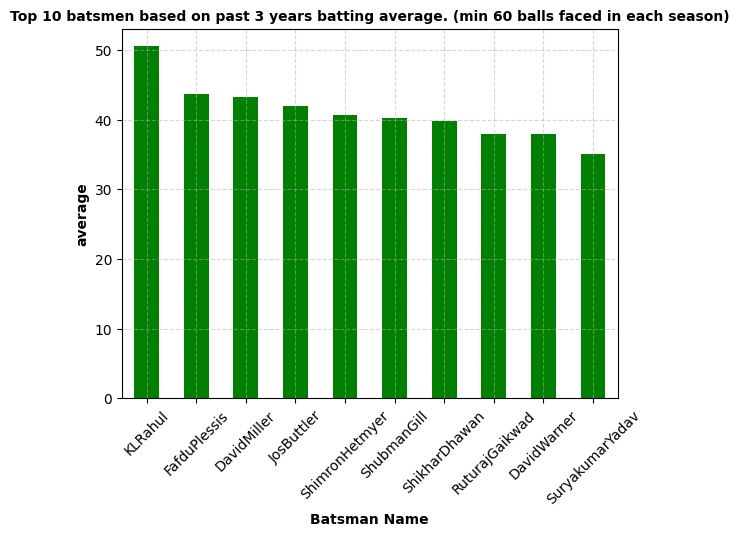

In [88]:
df_batsman_average.plot(kind="bar", color="green")
plt.title("Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)",fontsize="10", fontweight="bold")

plt.grid(linestyle='--', alpha=0.5)
plt.ylabel("average", fontsize="10", fontweight="bold")
plt.xlabel("Batsman Name", fontsize="10", fontweight="bold")

plt.xticks(rotation=45)
plt.show()

## 3. Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)

In [90]:
df_bating_eligible[["batsmanName","SR"]] .head()

,batsmanName,SR
0,RuturajGaikwad,118.51
1,FafduPlessis,145.76
3,MoeenAli,185.00
4,ShubmanGill,118.60
5,VenkateshIyer,156.25


In [91]:
df_batsman_SR = df_bating_eligible.groupby("batsmanName")["SR"].mean().sort_values(ascending=False).head(10)

df_batsman_SR

batsmanName
GlennMaxwell       150.498780
RavindraJadeja     139.281176
ShimronHetmyer     139.144000
SuryakumarYadav    138.758947
MShahrukhKhan      133.760645
DineshKarthik      133.450909
RahulTripathi      131.458837
YashasviJaiswal    127.891471
ShivamDube         127.700882
AndreRussell       126.324857
Name: SR, dtype: float64

In [92]:
df_bating_eligible.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,...,battingStyle,bowlingStyle,playingRole,outs,team1,team2,winner,margin,matchDate,season
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,...,Right hand Bat,Right arm Offbreak,Batter,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,...,Right hand Bat,Legbreak,Middle order Batter,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,...,Left hand Bat,Right arm Offbreak,Batting Allrounder,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,...,Right hand Bat,Right arm Offbreak,Opening Batter,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
5,T203817,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,...,Left hand Bat,Right arm Medium,Allrounder,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1


In [97]:
df_batsman_SR_formula = df_bating_eligible.groupby("batsmanName").apply(lambda x: (x["runs"].sum() / x["balls"].sum()) * 100).sort_values(ascending=False).head(10)
df_batsman_SR_formula

C:\Users\memon\AppData\Local\Temp\ipykernel_12196\3809711221.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_batsman_SR_formula = df_bating_eligible.groupby("batsmanName").apply(lambda x: (x["runs"].sum() / x["balls"].sum()) * 100).sort_values(ascending=False).head(10)


batsmanName
GlennMaxwell       161.436170
SuryakumarYadav    160.550459
AndreRussell       159.188034
ShimronHetmyer     157.274401
NicholasPooran     157.112069
PrithviShaw        153.195489
DineshKarthik      152.643172
YashasviJaiswal    152.150538
JosButtler         146.932814
ShivamDube         145.950156
dtype: float64

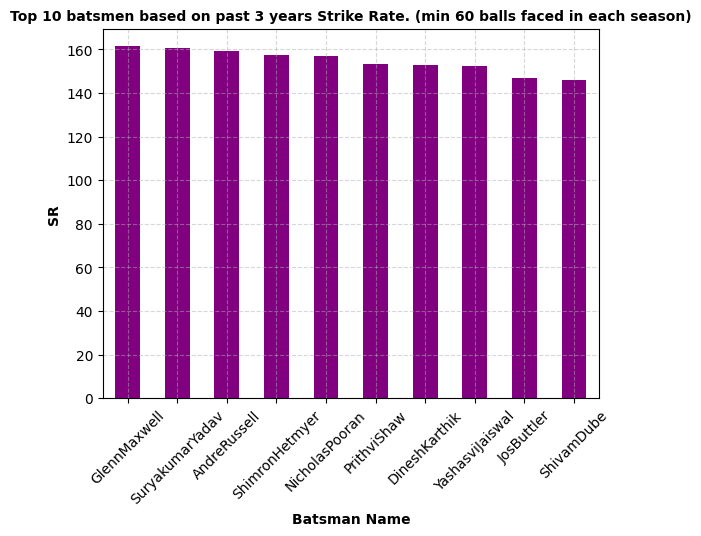

In [94]:
df_batsman_SR_formula.plot(kind="bar", color="purple")
plt.title("Top 10 batsmen based on past 3 years Strike Rate. (min 60 balls faced in each season)",fontsize="10", fontweight="bold")

plt.grid(linestyle='--', alpha=0.5)
plt.ylabel("SR", fontsize="10", fontweight="bold")
plt.xlabel("Batsman Name", fontsize="10", fontweight="bold")

plt.xticks(rotation=45)
plt.show()

## 4. Top 10 bowlers based on past 3 years total wickets taken.

In [98]:
df_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [100]:
df_bowling_top_wickets =df_bowling.groupby("bowlerName")["wickets"].sum().sort_values(ascending=False).head(10)
df_bowling_top_wickets

bowlerName
MohammedShami        67
YuzvendraChahal      66
HarshalPatel         65
RashidKhan           63
AveshKhan            47
ArshdeepSingh        45
KagisoRabada         45
VarunChakravarthy    44
ShardulThakur        43
TrentBoult           42
Name: wickets, dtype: int64

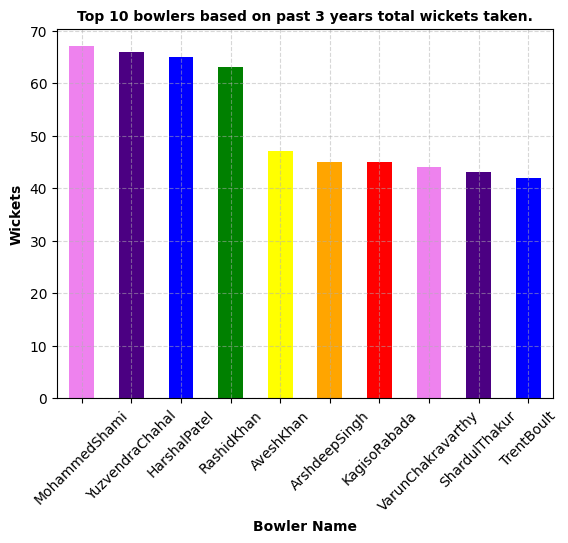

In [103]:
df_bowling_top_wickets.plot(kind="bar", color=["violet","indigo","blue","green","yellow","orange","red"])
plt.title("Top 10 bowlers based on past 3 years total wickets taken.",fontsize="10", fontweight="bold")

plt.grid(linestyle='--', alpha=0.5)
plt.ylabel("Wickets", fontsize="10", fontweight="bold")
plt.xlabel("Bowler Name", fontsize="10", fontweight="bold")

plt.xticks(rotation=45)
plt.show()

## 5. Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)

In [104]:
df_bowling_merged.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team,battingStyle,bowlingStyle,playingRole
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,KKR,Left hand Bat,Slow Left arm Orthodox,Allrounder
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,KKR,Right hand Bat,Right arm Fast medium,Bowler
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,KKR,Right hand Bat,Right arm Fast,Bowler
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,KKR,Right hand Bat,Legbreak Googly,Bowler
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,KKR,Left hand Bat,Right arm Offbreak,Bowling Allrounder


In [106]:
df_bowling_merged["full_overs"] = df_bowling_merged["overs"].astype(int)

df_bowling_merged["extra_balls"] = (df_bowling_merged["overs"]-df_bowling_merged["full_overs"])*10

df_bowling_merged.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team,battingStyle,bowlingStyle,playingRole,full_overs,extra_balls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,KKR,Left hand Bat,Slow Left arm Orthodox,Allrounder,3,0.0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,KKR,Right hand Bat,Right arm Fast medium,Bowler,4,0.0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,KKR,Right hand Bat,Right arm Fast,Bowler,4,0.0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,KKR,Right hand Bat,Legbreak Googly,Bowler,4,0.0
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,KKR,Left hand Bat,Right arm Offbreak,Bowling Allrounder,4,0.0


In [107]:
df_bowling_merged[df_bowling_merged["extra_balls"] > 0].head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team,battingStyle,bowlingStyle,playingRole,full_overs,extra_balls
17,T206442,Capitals Vs KKR,Capitals,RavichandranAshwin,3.5,0,27,2,7.04,7,1,1,1,0,Capitals,Right hand Bat,Right arm Offbreak,Bowling Allrounder,3,5.0
31,T208597,RCB Vs KKR,RCB,DanChristian,1.4,0,29,0,17.40,1,1,3,2,0,RCB,Right hand Bat,Right arm Fast medium,Allrounder,1,4.0
42,T201819,Capitals Vs Super Kings,Capitals,TomCurran,3.4,0,29,3,7.90,6,3,0,2,0,Capitals,Right hand Bat,Right arm Fast medium,Bowling Allrounder,3,4.0
76,T204179,KKR Vs Royals,KKR,ShivamMavi,3.1,0,21,4,6.63,10,3,0,0,0,KKR,Right hand Bat,Right arm Fast medium,Bowler,3,1.0
108,T205599,Royals Vs Mumbai,Royals,MustafizurRahman,2.2,0,32,1,13.71,6,3,2,1,0,Royals,Left hand Bat,Left arm Fast medium,Bowler,2,2.0


In [108]:
df_bowling_merged["total_balls"] = df_bowling_merged["full_overs"] * 6 + df_bowling_merged["extra_balls"]
df_bowling_merged.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,...,6s,wides,noBalls,team,battingStyle,bowlingStyle,playingRole,full_overs,extra_balls,total_balls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,...,3,0,0,KKR,Left hand Bat,Slow Left arm Orthodox,Allrounder,3,0.0,18.0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,...,2,0,0,KKR,Right hand Bat,Right arm Fast medium,Bowler,4,0.0,24.0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,...,2,2,0,KKR,Right hand Bat,Right arm Fast,Bowler,4,0.0,24.0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,...,2,0,1,KKR,Right hand Bat,Legbreak Googly,Bowler,4,0.0,24.0
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,...,1,1,0,KKR,Left hand Bat,Right arm Offbreak,Bowling Allrounder,4,0.0,24.0


In [ ]:
df_bowling_merged.drop(columns=["full_overs","extra_balls"], inplace=True)


In [112]:
df_bowling_merged.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team,battingStyle,bowlingStyle,playingRole,total_balls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,KKR,Left hand Bat,Slow Left arm Orthodox,Allrounder,18.0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,KKR,Right hand Bat,Right arm Fast medium,Bowler,24.0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,KKR,Right hand Bat,Right arm Fast,Bowler,24.0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,KKR,Right hand Bat,Legbreak Googly,Bowler,24.0
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,KKR,Left hand Bat,Right arm Offbreak,Bowling Allrounder,24.0


In [113]:
df_match.head()

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,Season 1
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,Season 1


In [114]:
df_bowling_merged_season = df_bowling_merged.merge(df_match, on="match_id")

df_bowling_merged_season.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,...,battingStyle,bowlingStyle,playingRole,total_balls,team1,team2,winner,margin,matchDate,season
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,...,Left hand Bat,Slow Left arm Orthodox,Allrounder,18.0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,...,Right hand Bat,Right arm Fast medium,Bowler,24.0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,...,Right hand Bat,Right arm Fast,Bowler,24.0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,...,Right hand Bat,Legbreak Googly,Bowler,24.0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,...,Left hand Bat,Right arm Offbreak,Bowling Allrounder,24.0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,Season 1


In [117]:
df_bowling_eligible = df_bowling_merged_season.groupby(["bowlerName","season"])["total_balls"].sum().reset_index()

df_bowling_eligible

,bowlerName,season,total_balls
0,AbdulSamad,Season 1,6.0
1,AbdulSamad,Season 2,6.0
2,AbhishekSharma,Season 1,54.0
3,AbhishekSharma,Season 2,24.0
4,AbhishekSharma,Season 3,72.0
...,...,...,...
366,YashasviJaiswal,Season 2,1.0
367,YudhvirSingh,Season 3,48.0
368,YuzvendraChahal,Season 1,318.0
369,YuzvendraChahal,Season 2,408.0


In [119]:
df_bowling_eligible =  df_bowling_eligible[df_bowling_eligible["total_balls"] >= 60]

df_bowling_eligible

,bowlerName,season,total_balls
4,AbhishekSharma,Season 3,72.0
5,AdamMilne,Season 1,84.0
7,AdamZampa,Season 3,132.0
13,AkashDeep,Season 2,113.0
15,AkashMadhwal,Season 3,153.0
...,...,...,...
364,YashDayal,Season 3,84.0
365,YashThakur,Season 3,191.0
368,YuzvendraChahal,Season 1,318.0
369,YuzvendraChahal,Season 2,408.0


In [121]:
df_bowling_eligible =  df_bowling_eligible.groupby("bowlerName").count()
df_bowling_eligible

,season,total_balls
bowlerName,,
AbhishekSharma,1,1
AdamMilne,1,1
AdamZampa,1,1
AkashDeep,1,1
AkashMadhwal,1,1
...,...,...
WashingtonSundar,3,3
WayneParnell,1,1
YashDayal,2,2


In [122]:
df_bowling_eligible = df_bowling_eligible[df_bowling_eligible.season == 3]

df_bowling_eligible.index

Index(['AndreRussell', 'AnrichNortje', 'ArshdeepSingh', 'AveshKhan',
       'AxarPatel', 'BhuvneshwarKumar', 'ChrisJordan', 'GlennMaxwell',
       'HarpreetBrar', 'HarshalPatel', 'JasonHolder', 'KagisoRabada',
       'KhaleelAhmed', 'KrunalPandya', 'LalitYadav', 'MoeenAli',
       'MohammedShami', 'MohammedSiraj', 'RahulChahar', 'RashidKhan',
       'RaviBishnoi', 'RavichandranAshwin', 'RavindraJadeja', 'RileyMeredith',
       'SandeepSharma', 'ShardulThakur', 'SunilNarine', 'TrentBoult',
       'UmranMalik', 'VarunChakravarthy', 'WashingtonSundar',
       'YuzvendraChahal'],
      dtype='object', name='bowlerName')

In [125]:
df_bowling_player_eligible =  df_bowling_merged[df_bowling_merged.bowlerName.isin(df_bowling_eligible.index)]

df_bowling_player_eligible.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team,battingStyle,bowlingStyle,playingRole,total_balls
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.50,5,2,2,0,1,KKR,Right hand Bat,Legbreak Googly,Bowler,24.0
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.50,6,0,1,1,0,KKR,Left hand Bat,Right arm Offbreak,Bowling Allrounder,24.0
8,T203817,Super Kings Vs KKR,Super Kings,ShardulThakur,4.0,0,38,3,9.50,11,3,1,4,1,Super Kings,Right hand Bat,Right arm Medium,Bowler,24.0
10,T203817,Super Kings Vs KKR,Super Kings,RavindraJadeja,4.0,0,37,2,9.25,9,3,2,1,0,Super Kings,Left hand Bat,Slow Left arm Orthodox,Allrounder,24.0
13,T206442,Capitals Vs KKR,KKR,SunilNarine,4.0,0,27,0,6.75,9,0,2,1,0,KKR,Left hand Bat,Right arm Offbreak,Bowling Allrounder,24.0


In [128]:
df_bowling_average =df_bowling_player_eligible.groupby("bowlerName").apply(lambda x : x["runs"].sum()/x["wickets"].sum()).round(2).sort_values().head(10)
df_bowling_average

C:\Users\memon\AppData\Local\Temp\ipykernel_12196\3640025843.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_bowling_average =df_bowling_player_eligible.groupby("bowlerName").apply(lambda x : x["runs"].sum()/x["wickets"].sum()).round(2).sort_values().head(10)


bowlerName
AndreRussell       18.23
YuzvendraChahal    20.20
HarshalPatel       20.35
RashidKhan         20.90
MohammedShami      20.97
AveshKhan          23.72
KagisoRabada       23.76
MoeenAli           23.86
AnrichNortje       24.77
UmranMalik         26.10
dtype: float64

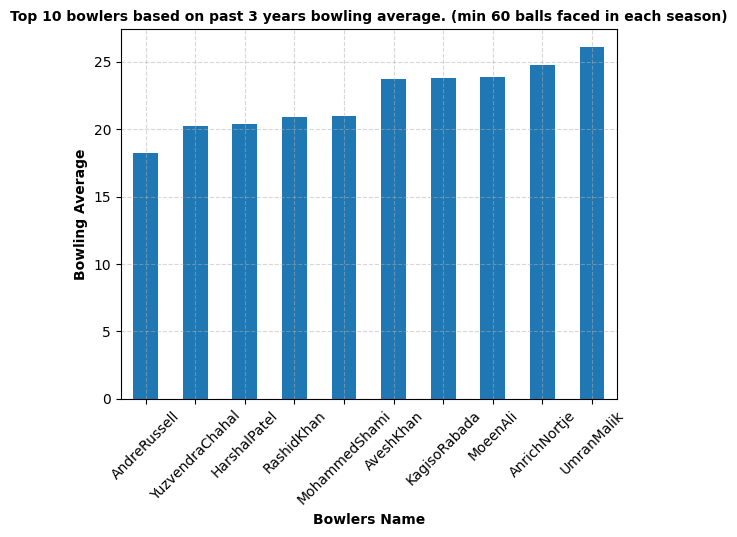

In [129]:
df_bowling_average.plot(kind="bar")
plt.title("Top 10 bowlers based on past 3 years bowling average. (min 60 balls faced in each season)",fontsize="10", fontweight="bold")

plt.grid(linestyle='--', alpha=0.5)
plt.ylabel("Bowling Average", fontsize="10", fontweight="bold")
plt.xlabel("Bowlers Name", fontsize="10", fontweight="bold")

plt.xticks(rotation=45)
plt.show()

## 6. Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)

In [132]:
df_bowling_eco_rate =df_bowling_player_eligible.groupby("bowlerName").apply(lambda x : x["runs"].sum()/x["overs"].sum()).round(2).sort_values().head(10)
df_bowling_eco_rate

C:\Users\memon\AppData\Local\Temp\ipykernel_12196\252630166.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_bowling_eco_rate =df_bowling_player_eligible.groupby("bowlerName").apply(lambda x : x["runs"].sum()/x["overs"].sum()).round(2).sort_values().head(10)


bowlerName
SunilNarine           6.60
MoeenAli              7.09
AxarPatel             7.11
RashidKhan            7.22
KrunalPandya          7.45
RavindraJadeja        7.46
RavichandranAshwin    7.53
VarunChakravarthy     7.58
HarpreetBrar          7.61
RahulChahar           7.68
dtype: float64

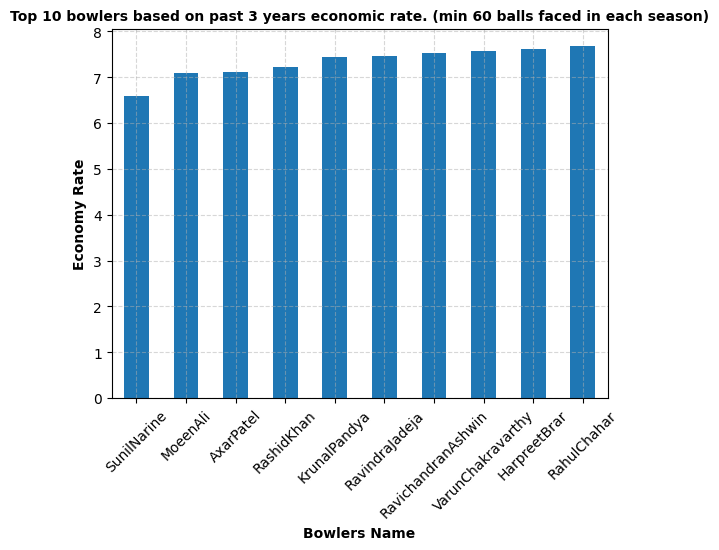

In [133]:
df_bowling_eco_rate.plot(kind="bar")
plt.title("Top 10 bowlers based on past 3 years economic rate. (min 60 balls faced in each season)",fontsize="10", fontweight="bold")

plt.grid(linestyle='--', alpha=0.5)
plt.ylabel("Economy Rate", fontsize="10", fontweight="bold")
plt.xlabel("Bowlers Name", fontsize="10", fontweight="bold")

plt.xticks(rotation=45)
plt.show()